# [ICTCOG] 4기 경북대 기본반

## 기계학습 (7)


In [1]:
import seaborn as sns

In [2]:
mpg =sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### encoding
- 문자를 숫자로 바꾸는 기법


1. label encoding
    - 학습 데이터로는 부적절

In [7]:
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [8]:
iris.species.map({'setosa':0,'virginica':1,'versicolor':2})

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

2. one-hot encoding
    - target 1 나머지 0으로 만든 벡터
    - 차원이 늘어남

In [9]:
import pandas as pd

In [10]:
pd.get_dummies(iris.species)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


### Feature Selection 
1. filter
2. wrapper
3. embeded


### filter
- 통계값을 이용

In [3]:
iris= sns.load_dataset('iris')

In [6]:
from sklearn.feature_selection import SelectKBest, chi2

In [11]:
sb=SelectKBest(chi2, k=3)

In [12]:
sb.fit_transform(iris.iloc[:,:-1],iris.species)

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [13]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
sb.get_support()

array([ True, False,  True,  True])

sepal_width 제외 

In [23]:
iris2=iris[['sepal_length', 'petal_length', 'petal_width','species']]

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn=KNeighborsClassifier()
knn2=KNeighborsClassifier()

차원이 많을 수록 overfitting 걸림

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cross_val_score(KNeighborsClassifier(),iris.iloc[:,:-1],iris.species, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [28]:
cross_val_score(KNeighborsClassifier(),iris2.iloc[:,:-1],iris2.species, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

### Wrapper
- 알고리즘을 감싸서 사용
### RFE
- feature 1개씩 지워나가면서 모든 경우의수 확인

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [30]:
rfe=RFE(KNeighborsClassifier(),n_features_to_select=3) 
#fit_transfrom 불가

In [37]:
rfe=RFE(LogisticRegression(),n_features_to_select=3)

In [38]:
rfe.fit_transform(iris.iloc[:,:-1], iris.species)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2],
       [2.9, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.7, 1.5, 0.2],
       [3.4, 1.6, 0.2],
       [3. , 1.4, 0.1],
       [3. , 1.1, 0.1],
       [4. , 1.2, 0.2],
       [4.4, 1.5, 0.4],
       [3.9, 1.3, 0.4],
       [3.5, 1.4, 0.3],
       [3.8, 1.7, 0.3],
       [3.8, 1.5, 0.3],
       [3.4, 1.7, 0.2],
       [3.7, 1.5, 0.4],
       [3.6, 1. , 0.2],
       [3.3, 1.7, 0.5],
       [3.4, 1.9, 0.2],
       [3. , 1.6, 0.2],
       [3.4, 1.6, 0.4],
       [3.5, 1.5, 0.2],
       [3.4, 1.4, 0.2],
       [3.2, 1.6, 0.2],
       [3.1, 1.6, 0.2],
       [3.4, 1.5, 0.4],
       [4.1, 1.5, 0.1],
       [4.2, 1.4, 0.2],
       [3.1, 1.5, 0.2],
       [3.2, 1.2, 0.2],
       [3.5, 1.3, 0.2],
       [3.6, 1.4, 0.1],
       [3. , 1.3, 0.2],
       [3.4, 1.5, 0.2],
       [3.5, 1.3, 0.3],
       [2.3, 1.3

In [40]:
rfe=RFE(DecisionTreeClassifier(),n_features_to_select=3)

In [41]:
rfe.fit_transform(iris.iloc[:,:-1], iris.species)

array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2],
       [2.9, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.7, 1.5, 0.2],
       [3.4, 1.6, 0.2],
       [3. , 1.4, 0.1],
       [3. , 1.1, 0.1],
       [4. , 1.2, 0.2],
       [4.4, 1.5, 0.4],
       [3.9, 1.3, 0.4],
       [3.5, 1.4, 0.3],
       [3.8, 1.7, 0.3],
       [3.8, 1.5, 0.3],
       [3.4, 1.7, 0.2],
       [3.7, 1.5, 0.4],
       [3.6, 1. , 0.2],
       [3.3, 1.7, 0.5],
       [3.4, 1.9, 0.2],
       [3. , 1.6, 0.2],
       [3.4, 1.6, 0.4],
       [3.5, 1.5, 0.2],
       [3.4, 1.4, 0.2],
       [3.2, 1.6, 0.2],
       [3.1, 1.6, 0.2],
       [3.4, 1.5, 0.4],
       [4.1, 1.5, 0.1],
       [4.2, 1.4, 0.2],
       [3.1, 1.5, 0.2],
       [3.2, 1.2, 0.2],
       [3.5, 1.3, 0.2],
       [3.6, 1.4, 0.1],
       [3. , 1.3, 0.2],
       [3.4, 1.5, 0.2],
       [3.5, 1.3, 0.3],
       [2.3, 1.3

### embeded
- 알고리즘에서 성능 유지하면서 덜 중요한 feature 제외
### DecisionTree
- 의사 결정 나무: 특정 조건에 따라 불확실성을 줄이는 가장 
- entropy: 불확실성을 낮춤

In [45]:
from sklearn.tree import plot_tree

In [48]:
dt=DecisionTreeClassifier()

In [50]:
dt.fit(iris.iloc[:,:-1], iris.species)

DecisionTreeClassifier()

사전에 anaconda에서 설치해야 그려짐

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

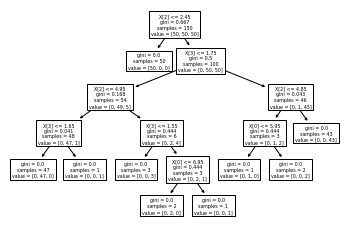

In [53]:
plot_tree(dt)

In [54]:
dt.feature_importances_

array([0.02666667, 0.        , 0.55072262, 0.42261071])

## ensemble
- 여러개의 모델을 함께 사용하여 성능이 좋음
- 과접합 방지 
    - 많은 대회에서 ensemble기법 사용(정확도가 속도보다 중요)
    
    - 단일 모델의 문제점:
        - 성능(voting,boosting, stacking)
        - overfitting(bagging)
    
### VotingClassifier
- ensemble의 일종으로 같은 데이터로 종류가 다른 모델로 voting 방식으로 함
    - hard voting :다수결
        - 성능에 상관없이 각 모델별로 동인한 표
    - soft voting : 전체 확률 합을 구하여 큰 값을 선택
-  VotingClassifier( (str, estimator) ) #pipeline과 비슷

In [55]:
from sklearn.ensemble import VotingClassifier

In [91]:
vc=VotingClassifier([   ('lr',LogisticRegression()),
                        ('dt',DecisionTreeClassifier()),
                        ('knn', KNeighborsClassifier())
                    ],voting='soft')

In [92]:
vc.fit(iris.iloc[:,:-1],iris.species)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [93]:
vc.predict([[3,3,3,3]])

array(['virginica'], dtype=object)

In [94]:
vc.get_params()

{'estimators': [('lr', LogisticRegression()),
  ('dt', DecisionTreeClassifier()),
  ('knn', KNeighborsClassifier())],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'soft',
 'weights': None,
 'lr': LogisticRegression(),
 'dt': DecisionTreeClassifier(),
 'knn': KNeighborsClassifier(),
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'dt__ccp_alpha': 0.0,
 'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': None,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_impurity_split': None,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__presort': '

In [95]:
dir(vc)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_collect_probas',
 '_estimator_type',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_log_message',
 '_more_tags',
 '_predict',
 '_predict_proba',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_params',
 '_sk_visual_block_',
 '_validate_data',
 '_validate_estimators',
 '_validate_names',
 '_weights_not_none',
 'classes_',
 'estimators',
 'estimators_',
 'fit',
 'fit_transform',
 'flatten_transform',
 'get_params',
 'le_',
 'n_features_in

In [96]:
vc.score

<bound method ClassifierMixin.score of VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')>

In [97]:
vars(vc )

{'estimators': [('lr', LogisticRegression()),
  ('dt', DecisionTreeClassifier()),
  ('knn', KNeighborsClassifier())],
 'voting': 'soft',
 'weights': None,
 'n_jobs': None,
 'flatten_transform': True,
 'verbose': False,
 'le_': LabelEncoder(),
 'classes_': array(['setosa', 'versicolor', 'virginica'], dtype=object),
 'estimators_': [LogisticRegression(),
  DecisionTreeClassifier(),
  KNeighborsClassifier()],
 'named_estimators_': {'lr': LogisticRegression(),
  'dt': DecisionTreeClassifier(),
  'knn': KNeighborsClassifier()}}

In [98]:
vc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [99]:
vc.transform(iris.iloc[:,:-1])

array([[9.81796729e-01, 1.82032562e-02, 1.44268498e-08, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.71724746e-01, 2.82752243e-02, 3.01656728e-08, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.85443803e-01, 1.45561843e-02, 1.23261377e-08, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.36439778e-04, 1.56811416e-01, 8.43052144e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.48444383e-05, 3.84985886e-02, 9.61456567e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.68278401e-04, 2.35056640e-01, 7.64475082e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [100]:
vc.transform([[3,3,3,3]]) #결과 9개 (각 모델별 )

array([[0.56906732, 0.16402821, 0.26690447, 0.        , 0.        ,
        1.        , 0.        , 0.8       , 0.2       ]])

In [101]:
lr=LogisticRegression()

In [102]:
lr.fit(iris.iloc[:,:-1],iris.species)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

- 각각에 대해서 확률로 표현 

In [86]:
lr.predict_proba([[3,3,3,3]])

array([[0.56906732, 0.16402821, 0.26690447]])

In [87]:
lr.predict_log_proba([[3,3,3,3]])

array([[-0.56375654, -1.80771688, -1.32086446]])

- logistic regression 은 함수를 찾으므로  decision_function
    - simoid/ logit = $\frac{1}{1+e^{-x}}$
- decision tree  은 함수가 없고 information gain/gini 기반으로 확률로 예측 predict_proba

In [89]:
knn.fit(iris.iloc[:,:-1],iris.species)
knn.predict_proba([[3,3,3,3]]) #1 4개,2 1개 선택

array([[0. , 0.8, 0.2]])

In [90]:
lr.decision_function([[3,3,3,3]]) #각 클래스별 confidence socre 예측

array([[ 0.66702275, -0.57693759, -0.09008516]])

### Bootstrap
- ensemble의 또 다른 방법인 
- bagging(Bootstrap Aggregation )
    - 랜덤 복원 샘플링해서 여러 모델은 만들어 평균울 내어 overfitting 방지 

### Bagging
- decision tree 기본 설정
- Bootstrap Aggregation )
    - 주어진 데이터에서 **랜덤 복원 샘플링**해서 모델을 여러개 만들어 평균울 냄
    - 편차를 줄여서 **overfitting 방지**( 일반화)
> Statistical Modeling : The Two Cultures: https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726
    - decision tree 기반
    - CART 
    - Random Forest : 나무가 모이면 숲:
- parametric model 
    - y=ax+b 1차식

데이터 기반으로 가장 좋은 방법을 찾음
- black box model: 설명 불가해도 성능이 좋음

In [107]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [108]:
bg=BaggingClassifier()

In [109]:
bg.fit(iris.iloc[:,:-1],iris.species)

BaggingClassifier()

### RandomForestClassifier
- decision tree기반으로 각각의 데이터를 여러트리에 동시에 집어 넣어서 voting으로 최종결과를 냄
-  overfitting방지, 성능 향상
> ensemble끼리 ensemble시킴 

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rf=RandomForestClassifier()

-  주어진 데이터에서 일부 복원 추출하므로 데이터 크기가 작아 성능 향상은 크지 않아서 과적합에 적합

### boosting
- 랜덤 복원 샘플링해서 여러 모델은 만들어 분류 잘 못하는 모델에 가중치를 주어 성능이 좋아짐 
- Eg. XGBoost, lightGBM(Gradient Boosting Machine) over fitting도 방지하면서 성능 향상, 학습 속도 저하

Big data Availability
New ML technique
GPU Acceleration

### AdaBoostClassifier
- 기본적으로 decision tree 계열
- parametric model

In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [112]:
ada=AdaBoostClassifier()

In [113]:
ada=AdaBoostClassifier(LogisticRegression())

### stacking
- kaggle ensemble guide 가장 우승을 많이함
- 모델을 여러개 만들기 때문에 속도가 느림 
- StackingClassifier( estimators, final_estimator=None(Logistic,...)

In [116]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

In [117]:
sc=StackingClassifier([('knn',KNeighborsClassifier()),('dt',DecisionTreeClassifier()), ('svm',SVC())])

In [118]:
sc.fit(iris.iloc[:,:-1],iris.species)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier()),
                               ('svm', SVC())])

In [120]:
sc.predict([[3,3,3,3,]])

array(['versicolor'], dtype=object)

In [123]:
sc.decision_function([[3,3,3,3,]]) #최종 모델로 logistic regression 

array([[-2.16149727,  1.82989138,  0.33160589]])

In [124]:
sc.predict_proba([[3,3,3,3]]) #1번째 가장큼

array([[0.01487458, 0.80516135, 0.17996407]])

In [125]:
sc.transform([[3,3,3,3,]]) #각 모델별로 

array([[ 0.        ,  0.8       ,  0.2       ,  0.        ,  0.        ,
         1.        , -0.11414956,  2.12314294,  0.97963517]])